# OC - IA P08

# Participez à la conception d'une voiture autonome

In [1]:
!wget "https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/AI+Engineer/Project+8+-+Participez+%C3%A0+la+conception+d'une+voiture+autonome/P8_Cityscapes_gtFine_trainvaltest.zip"

--2022-08-22 11:20:01--  https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/AI+Engineer/Project+8+-+Participez+%C3%A0+la+conception+d'une+voiture+autonome/P8_Cityscapes_gtFine_trainvaltest.zip
Resolving s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)... 52.218.90.43
Connecting to s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)|52.218.90.43|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252567705 (241M) [application/zip]
Saving to: ‘P8_Cityscapes_gtFine_trainvaltest.zip’

P8_Cityscapes_gtFin 100%[===================>] 240.87M  70.6MB/s    in 3.4s    

2022-08-22 11:20:05 (70.6 MB/s) - ‘P8_Cityscapes_gtFine_trainvaltest.zip’ saved [252567705/252567705]



In [2]:
!wget "https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/AI+Engineer/Project+8+-+Participez+%C3%A0+la+conception+d'une+voiture+autonome/P8_Cityscapes_leftImg8bit_trainvaltest.zip"

--2022-08-22 11:20:06--  https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/AI+Engineer/Project+8+-+Participez+%C3%A0+la+conception+d'une+voiture+autonome/P8_Cityscapes_leftImg8bit_trainvaltest.zip
Resolving s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)... 52.218.90.43
Connecting to s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)|52.218.90.43|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11592327197 (11G) [application/zip]
Saving to: ‘P8_Cityscapes_leftImg8bit_trainvaltest.zip’

P8_Cityscapes_leftI 100%[===================>]  10.80G  75.7MB/s    in 2m 21s  

2022-08-22 11:22:27 (78.5 MB/s) - ‘P8_Cityscapes_leftImg8bit_trainvaltest.zip’ saved [11592327197/11592327197]



In [3]:
!unzip -o /content/P8_Cityscapes_gtFine_trainvaltest.zip
!unzip -o /content/P8_Cityscapes_leftImg8bit_trainvaltest.zip

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
 extracting: leftImg8bit/train/jena/jena_000074_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/jena/jena_000040_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/jena/jena_000020_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/jena/jena_000030_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/jena/jena_000005_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/jena/jena_000059_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/jena/jena_000100_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/jena/jena_000034_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/jena/jena_000089_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/jena/jena_000104_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/jena/jena_000107_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/jena/jena_000080_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/jena/jena_00000

In [4]:
!pip install -U segmentation-models

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 7.4 MB/s 


In [5]:
# Check libcudnn8 version
!apt-cache policy libcudnn8

# Install latest version
!apt install --allow-change-held-packages libcudnn8=8.4.1.50-1+cuda11.6

# Export env variables
!export PATH=/usr/local/cuda-11.4/bin${PATH:+:${PATH}}
!export LD_LIBRARY_PATH=/usr/local/cuda-11.4/lib64:$LD_LIBRARY_PATH
!export LD_LIBRARY_PATH=/usr/local/cuda-11.4/include:$LD_LIBRARY_PATH
!export LD_LIBRARY_PATH=$LD_LIBRARY_PATH:/usr/local/cuda/extras/CUPTI/lib64

# Install tensorflow
!pip install tflite-model-maker==0.4.0
!pip uninstall -y tensorflow && pip install -q tensorflow==2.9.1
!pip install pycocotools==2.0.4
!pip install opencv-python-headless==4.6.0.66

libcudnn8:
  Installed: 8.0.5.39-1+cuda11.1
  Candidate: 8.5.0.96-1+cuda11.7
  Version table:
     8.5.0.96-1+cuda11.7 600
        600 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages
     8.5.0.96-1+cuda10.2 600
        600 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages
     8.4.1.50-1+cuda11.6 600
        600 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages
     8.4.1.50-1+cuda10.2 600
        600 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages
     8.4.0.27-1+cuda11.6 600
        600 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages
     8.4.0.27-1+cuda10.2 600
        600 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages
     8.3.3.40-1+cuda11.5 600
        600 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages
     8.3.3.40-1+cuda10.2

Found existing installation: tensorflow 2.9.1
Uninstalling tensorflow-2.9.1:
  Successfully uninstalled tensorflow-2.9.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Librairies

In [111]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
import math
import tqdm
import cv2
import tensorflow as tf
from tensorflow import keras
from keras import layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import Sequence
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, Dropout , BatchNormalization
from tensorflow.keras.layers import Activation, Flatten, Lambda, Conv2DTranspose, concatenate
from tensorflow.keras.layers import Conv2D, MaxPooling2D, concatenate, UpSampling2D, SpatialDropout2D
from tensorflow.keras.layers import Activation, MaxPool2D, Concatenate
from tensorflow.keras.optimizers import RMSprop, SGD
from tensorflow.keras.metrics import MeanIoU, binary_crossentropy
from tensorflow.keras.utils import Sequence
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.python.keras import backend as K
import segmentation_models as sm
import imgaug as ia
from imgaug import augmenters as iaa
import pickle
import time
import datetime
from google.colab import files
from segmentation_models.metrics import iou_score

In [2]:
%pwd

'/content'

## Constantes

In [7]:
path = {}
# leftImg8bit : images RGB 
path["leftImg8bit"] = '/content/leftImg8bit'
# gtFine : masques
path["gtFine"] = '/content/gtFine'

## Explications préalables

En entrée, nous allons envoyer à nos réseaux de neurones des images RGB. Ces images ont la forme d'un tenseur d'ordre 3 et de dimension (hauteur * largeur * 3). 3 est le nombre de canaux. Pour une image en noir et blanc, il n'y en a qu'un, mais 3 pour une image RGB : un canal pour le rouge, un pour le vert, un pour le bleu. Chaque valeur de la matrice représente un pixel qui a une valeur entre 0 et 255, selon l'intensité de la couleur d'un canal spécifique.

En sortie, on souhaite avoir une matrice de dimensions (hauteur x largeur x 1), avec chaque pixel ayant n’ont pas une intensité entre 0 et 255, mais un nombre correspondant à nos classes. La valeur du pixel est donc compris entre 0 (indice du background) à n (nombre de classe dans nos images).

![](https://i0.wp.com/deeplylearning.fr/wp-content/uploads/2020/12/entree-sortie-template.png?w=800&ssl=1)

Pour réaliser ce genre de classification on utilise de l’entrainement supervisé. Cela consiste à entrainer notre réseau de neurones sur des couples (X, Y).

X est votre image dans laquelle vous souhaitez analyser la présence ou non d’une classe Y que l’on peut appeller son ‘étiquette’, est ce que l’on cherche à avoir. Cela correspond donc à nos masques contenant nos classes à détecter.

## Récupération des données

In [8]:
def get_img_paths(path):
    img_paths = [ f.path for f in os.scandir(path) if f.is_dir() ]
    img_paths = [s.replace("\\", "/") for s in img_paths]
    path_list = []
    for subdir in img_paths:
        file_list = os.listdir(subdir)
        for file in file_list:
            path_list.append(os.path.join(subdir, file).replace("\\", "/"))
    return path_list

def get_img_and_mask_paths(dataset_type):
    img_paths = get_img_paths(os.path.join(path["leftImg8bit"],dataset_type))
    ann_paths = get_img_paths(os.path.join(path["gtFine"],dataset_type))
    labelIds = []
    for f in ann_paths:
        if f.endswith("_gtFine_labelIds.png"):
            labelIds .append(f)
    ann_paths = labelIds
    img_paths.sort()
    ann_paths.sort()
    return img_paths, ann_paths

def construct_path_dict():
    datasets = ["train", "val", "test"]
    paths_dict = {}
    for dataset in datasets:
        paths_dict[dataset] = {}
        img_paths, ann_paths = get_img_and_mask_paths(dataset)
        paths_dict[dataset]["leftImg8bit"] = img_paths
        paths_dict[dataset]["gtFine"] = ann_paths
    return paths_dict

In [9]:
data_paths = construct_path_dict()
data_paths

{'train': {'leftImg8bit': ['/content/leftImg8bit/train/aachen/aachen_000000_000019_leftImg8bit.png',
   '/content/leftImg8bit/train/aachen/aachen_000001_000019_leftImg8bit.png',
   '/content/leftImg8bit/train/aachen/aachen_000002_000019_leftImg8bit.png',
   '/content/leftImg8bit/train/aachen/aachen_000003_000019_leftImg8bit.png',
   '/content/leftImg8bit/train/aachen/aachen_000004_000019_leftImg8bit.png',
   '/content/leftImg8bit/train/aachen/aachen_000005_000019_leftImg8bit.png',
   '/content/leftImg8bit/train/aachen/aachen_000006_000019_leftImg8bit.png',
   '/content/leftImg8bit/train/aachen/aachen_000007_000019_leftImg8bit.png',
   '/content/leftImg8bit/train/aachen/aachen_000008_000019_leftImg8bit.png',
   '/content/leftImg8bit/train/aachen/aachen_000009_000019_leftImg8bit.png',
   '/content/leftImg8bit/train/aachen/aachen_000010_000019_leftImg8bit.png',
   '/content/leftImg8bit/train/aachen/aachen_000011_000019_leftImg8bit.png',
   '/content/leftImg8bit/train/aachen/aachen_000012_

In [10]:
# sert à faire le lien entre nos 35 labelIds et nos 8 catégories
categories = {
    'void': [0, 1, 2, 3, 4, 5, 6],
    'flat': [7, 8, 9, 10],
    'construction': [11, 12, 13, 14, 15, 16],
    'object': [17, 18, 19, 20],
    'nature': [21, 22],
    'sky': [23],
    'human': [24, 25],
    'vehicle': [26, 27, 28, 29, 30, 31, 32, 33, -1]
}

categories_id = {
        'void': (0),
        'flat': (1),
        'construction': (2),
        'object': (3),
        'nature': (4),
        'sky': (5),
        'human':(6),
        'vehicle': (7)
    }

palette = sns.color_palette("viridis", len(categories))

def convertCategories(x):
    if x in categories['void']:
        return 0
    elif x in categories['flat']:
        return 1
    elif x in categories['construction']:
        return 2
    elif x in categories['object']:
        return 3
    elif x in categories['nature']:
        return 4
    elif x in categories['sky']:
        return 5
    elif x in categories['human']:
        return 6
    elif x in categories['vehicle']:
        return 7
    
convertCategories_v = np.vectorize(convertCategories)

def preprocessImg(img):
    img_matrix = np.expand_dims(img, 2)
    converted_img = convertCategories_v(img_matrix)
    return converted_img

def set_mask_color(mask):
    cats_colors = palette
    if len(mask.shape) == 3:
        mask = mask[:, :, 0]
    # Masque RVB (3 canaux)
    mask_img = np.zeros((mask.shape[0], mask.shape[1], 3)).astype('float')
    for color_num in range(8):
        # Le numéro de canal est le même que l'index des palette de couleurs
        mask_color = (mask == color_num)
        for i in range(3):
            # valeurs de i :
            # 0: rouge
            # 1: vert
            # 2: bleu
            mask_img[:,:,i] += (mask_color*(cats_colors[color_num][i]))
    return(mask_img)

def show(image, figsize=(5,5)):
    plt.figure(figsize=figsize)
    plt.axis('off')
    plt.imshow(image)
    plt.show()

def convert_mask(img):
  img = np.squeeze(img)
  mask = np.zeros((img.shape[0], img.shape[1], len(categories_id)), dtype='uint8')

  for i in range(-1, 34):
      for cat in categories:
          if i in categories[cat]:
              mask[:,:,categories_id[cat]] = np.logical_or(mask[:,:,categories_id[cat]],(img==i))
              break

  return np.array(mask, dtype='uint8')  

In [11]:
IMG_WIDTH = 128
IMG_HEIGHT = 128

class Generator(Sequence):
    def __init__(
        self, 
        images_paths,
        mask_paths,
        batch_size=4, 
        target_dim=(IMG_WIDTH, IMG_HEIGHT), 
        img_channels=3,
        msk_channels=1,
        shuffle=True, 
        augment=True,
        augment_multiplier=4
    ):
        self.images_paths = images_paths.copy()
        self.mask_paths = mask_paths.copy()
        self.batch_size = batch_size
        self.target_dim = target_dim
        self.img_channels = img_channels
        self.msk_channels = msk_channels
        self.shuffle = shuffle
        self.augment = augment
        self.augment_multiplier = augment_multiplier
        if self.augment==True:
            tmp_img_list = []
            tmp_msk_list = []
            for i in range(self.augment_multiplier):
                tmp_img_list = tmp_img_list + self.images_paths
                tmp_msk_list = tmp_msk_list + self.mask_paths
            self.images_paths = tmp_img_list
            self.mask_paths = tmp_msk_list
        self.on_epoch_end()
    
    def __len__(self):
        return int(np.floor(len(self.images_paths) / self.batch_size))
    
    def __getitem__(self, index):
        indices = self.indices[index*self.batch_size:(index+1)*self.batch_size]
        X_paths = [self.images_paths[i] for i in indices]
        Y_paths = [self.mask_paths[i] for i in indices]
        X, y = self.__data_generation(X_paths, Y_paths)
        return X, y
    
    def on_epoch_end(self):
        self.indices = np.arange(len(self.images_paths))
        if self.shuffle == True:
            np.random.shuffle(self.indices)
    
    def __data_generation(self, X_paths, Y_paths):
        img = np.empty(
            (
                self.batch_size, 
                *self.target_dim, 
                self.img_channels
            )
        )
        seg = np.empty(
            (
                self.batch_size, 
                *self.target_dim, 
                self.msk_channels
            )
        )
        
        for i, image_path in enumerate(X_paths):
            img_tmp = self.__load_image(
                path=image_path,
                image_size=self.target_dim
            )
            img[i,] = img_tmp
        for i, mask_path in enumerate(Y_paths):
            seg_tmp = self.__load_mask(
                path=mask_path,
                image_size=self.target_dim
            )
            seg[i,] = seg_tmp       
        if self.augment:
# #             for i in range(self.augment_multiplier):
            img_aug, seg_aug = self.__augmentation(img, seg)
# #                 img = np.concatenate((img, img_aug), axis=0)
# #                 seg = np.concatenate((seg, seg_aug), axis=0)
            img = img_aug
            seg = seg_aug

        
        return img, seg
    
    def __load_image(self, path, image_size):
        img = image.img_to_array(
            image.load_img(
                path, 
                target_size=image_size
            )
        )/255.
        return img

    def __load_mask(self, path, image_size):
        msk = image.img_to_array(
            image.load_img(
                path,
                color_mode="grayscale",
                target_size=image_size,
                interpolation='nearest'
            )
        )
        msk = convertCategories_v(msk)
        return msk.astype(int)

    def __load_image_mask_by_idx(
        self,
        idx, 
        image_paths, 
        mask_paths, 
        image_size
    ):
        image = _load_image(
            path=image_paths[idx],
            image_size=image_size
        )
        mask = _load_mask(
            path = mask_paths[idx],
            image_size = image_size
        )
        return image, mask
    
    def __augmentation(self, img, seg):
        img_batch = np.empty((self.batch_size, *self.target_dim, self.img_channels))
        seg_batch = np.empty((self.batch_size, *self.target_dim, self.msk_channels))
        for i in range(self.batch_size):
            img_batch[i,], seg_batch[i,] = self.__rotate_crop(img[i,], seg[i,], 6)
#             img_batch[i,], seg_batch[i,] = self.__zoom(img_batch[i,], seg_batch[i,], 0.001)
            img_batch[i,], seg_batch[i,] = self.__sharpen(img_batch[i,], seg_batch[i,])
#             img_batch[i,], seg_batch[i,] = self.__gaussianBlur(img_batch[i,], seg_batch[i,])
            img_batch[i,] = self.__channel_shift(img_batch[i,], 0.2)
            
            seed = np.random.randint(self.batch_size)
            angle, crop, sigma, severity, flipChance = self.generateRandomParams(seed)

            img_augmenter = iaa.Sequential(
                [
                    iaa.GaussianBlur(sigma=(0.0, sigma)),
                    # iaa.Affine(rotate=(angle)),
                    iaa.Fliplr(flipChance),
#                     iaa.Crop(percent=crop),
#                     iaa.imgcorruptlike.Brightness(severity=severity),
#                     iaa.pillike.Autocontrast(cutoff=(0,10), per_channel=False),
#                     iaa.ChangeColorTemperature(kelvin=(5000, 40000))
                ]
            )
            msk_augmenter = iaa.Sequential(
                [
                    # iaa.Affine(rotate=(angle)),
                    iaa.Fliplr(flipChance),
#                     iaa.Crop(percent=crop),
                ]
            )
            
            img_batch[i,] = img_augmenter(image=img_batch[i,])
            seg_batch[i,] = msk_augmenter(image=seg_batch[i,])
        return img_batch, seg_batch
    
    
    def generateRandomParams(self, seed):
        np.random.seed(seed)
        angle = np.random.randint(26)
        np.random.seed(seed*2)
        positive = np.random.randint(2)
        sigma = np.random.uniform(0, 1)

        if positive == 0:
            angle = angle * -1

        crop = np.random.randint(3)
        crop = crop / 10
        severity = np.random.randint(5)
        flipChance = np.random.randint(2) # 0 ou 1, retourne l'image ou non. Permet d'appliquer la même transfor sur l'img et le msk
        return angle, crop, sigma, severity, flipChance
    
    def __clip(self, X, mini=0, maxi=1):
        mini_mask = np.where(X < mini)
        maxi_mask = np.where(X > maxi)
        X[mini_mask] = mini
        X[maxi_mask] = maxi
        return X
    
    def __crop(self, X, Y, min_size_ratio, max_size_ratio=(1,1)):
        size = np.array(X.shape[:2])
        mini = min_size_ratio * size
        maxi = max_size_ratio * size
        h = np.random.randint(mini[0], maxi[0])
        w = np.random.randint(mini[1], maxi[1])
        shift_h = np.random.randint(0, size[0] - h)
        shift_w = np.random.randint(0, size[1] - w)
        X = X[shift_h:shift_h+h, shift_w:shift_w+w]
        Y = Y[shift_h:shift_h+h, shift_w:shift_w+w]
        return X,Y
    
    def __sharpen(self, X, Y, max_center=3):
        identity = np.array(
            [
                [0, 0, 0],
                [0, 1, 0],
                [0, 0, 0]
            ]
        )
        sharpen = np.array(
            [
                [0, -1, 0],
                [-1, 4, -1],
                [0, -1, 0]
            ]
        ) / 4
        sharp = sharpen * np.random.random() * max_center
        kernel = identity + sharp
        X = cv2.filter2D(X, -1, kernel)
        return X, Y

    def __gaussianBlur(self, X, Y, max_kernel=(7,7)):
        kernel_size = (
            np.random.randint(1, max_kernel[0] + 1),
            np.random.randint(1, max_kernel[1] + 1),
        )
        X = cv2.GaussianBlur(X, kernel_size, 0)
        return X, Y

    def __brightness(self, X, Y, range_brightness=(-50,50)):
        brightness = np.random.randint(range_brightness[0], range_brightness[1])
        X[0] = self.__clip(X[0] + brightness)
        X[1] = self.clip(X[1] + brightness)
        return X, Y

    def __zoom(self, img, seg, value=0.5):
        value = random.uniform(value, 1)
        h, w = img.shape[:2]
        h_taken = int(value*h)
        w_taken = int(value*w)
        h_start = random.randint(0, h-h_taken)
        w_start = random.randint(0, w-w_taken)
        
        img = img[h_start:h_start+h_taken, w_start:w_start+w_taken, :]
        seg = seg[h_start:h_start+h_taken, w_start:w_start+w_taken, :]

        img = cv2.resize(img, (h, w), cv2.INTER_CUBIC)
        seg = cv2.resize(seg, (h, w), interpolation=None)
        seg = seg.astype("int")
        seg = np.expand_dims(seg, axis=2)

        return img, seg


    def __rotation(self, img, seg, angle=20):
        angle = int(random.uniform(-angle, angle))
        h, w = img.shape[:2]
        M = cv2.getRotationMatrix2D((int(w/2), int(h/2)), angle, 1)

        img = cv2.warpAffine(img, M, (w, h))
        seg = cv2.warpAffine(seg, M, (w, h))

        img = cv2.warpAffine(img, M, (w, h))
        seg = cv2.warpAffine(seg, M, (w, h))
        
        return img, seg


    def __channel_shift(self, img, value=0.5):
        value = random.uniform(-value, value)
        img = img + value
        img[:,:,:][img[:,:,:]>1]  = 1
        img[:,:,:][img[:,:,:]<0]  = 0
        return img
    
    
    def rotate_image(self, image, angle):
        # Obtenir la taille de l'image
        # Non, ce n'est pas une erreur - NumPy stocke les matrices d'images à l'envers
        image_size = (image.shape[1], image.shape[0])
        image_center = tuple(np.array(image_size) / 2)

        # Convertir la matrice de rotation OpenCV 3x2 en 3x3
        rot_mat = np.vstack(
            [cv2.getRotationMatrix2D(image_center, angle, 1.0), [0, 0, 1]]
        )

        rot_mat_notranslate = np.matrix(rot_mat[0:2, 0:2])

        # Raccourci pour les calculs ci-dessous
        image_w2 = image_size[0] * 0.5
        image_h2 = image_size[1] * 0.5

        # Obtenir les coordonnées pivotées des coins de l'image
        rotated_coords = [
            (np.array([-image_w2,  image_h2]) * rot_mat_notranslate).A[0],
            (np.array([ image_w2,  image_h2]) * rot_mat_notranslate).A[0],
            (np.array([-image_w2, -image_h2]) * rot_mat_notranslate).A[0],
            (np.array([ image_w2, -image_h2]) * rot_mat_notranslate).A[0]
        ]

        # Trouver la taille de la nouvelle image
        x_coords = [pt[0] for pt in rotated_coords]
        x_pos = [x for x in x_coords if x > 0]
        x_neg = [x for x in x_coords if x < 0]

        y_coords = [pt[1] for pt in rotated_coords]
        y_pos = [y for y in y_coords if y > 0]
        y_neg = [y for y in y_coords if y < 0]

        right_bound = max(x_pos)
        left_bound = min(x_neg)
        top_bound = max(y_pos)
        bot_bound = min(y_neg)

        new_w = int(abs(right_bound - left_bound))
        new_h = int(abs(top_bound - bot_bound))

        # Trouver la taille de la nouvelle image
        trans_mat = np.matrix([
            [1, 0, int(new_w * 0.5 - image_w2)],
            [0, 1, int(new_h * 0.5 - image_h2)],
            [0, 0, 1]
        ])

        # Calculer la transformée pour la rotation et la translation combinées
        affine_mat = (np.matrix(trans_mat) * np.matrix(rot_mat))[0:2, :]

        # Applique la transformation
        result = cv2.warpAffine(
            image,
            affine_mat,
            (new_w, new_h),
#             flags=cv2.INTER_LINEAR
            flags=cv2.INTER_NEAREST
        )

        return result


    def largest_rotated_rect(self, w, h, angle):
        quadrant = int(math.floor(angle / (math.pi / 2))) & 3
        sign_alpha = angle if ((quadrant & 1) == 0) else math.pi - angle
        alpha = (sign_alpha % math.pi + math.pi) % math.pi

        bb_w = w * math.cos(alpha) + h * math.sin(alpha)
        bb_h = w * math.sin(alpha) + h * math.cos(alpha)

        gamma = math.atan2(bb_w, bb_w) if (w < h) else math.atan2(bb_w, bb_w)

        delta = math.pi - alpha - gamma

        length = h if (w < h) else w

        d = length * math.cos(alpha)
        a = d * math.sin(alpha) / math.sin(delta)

        y = a * math.cos(gamma)
        x = y * math.tan(gamma)

        return (
            bb_w - 2 * x,
            bb_h - 2 * y
        )


    def crop_around_center(self, image, width, height):
        image_size = (image.shape[1], image.shape[0])
        image_center = (int(image_size[0] * 0.5), int(image_size[1] * 0.5))

        if(width > image_size[0]):
            width = image_size[0]

        if(height > image_size[1]):
            height = image_size[1]

        x1 = int(image_center[0] - width * 0.5)
        x2 = int(image_center[0] + width * 0.5)
        y1 = int(image_center[1] - height * 0.5)
        y2 = int(image_center[1] + height * 0.5)

        return image[y1:y2, x1:x2]

    def __rotate_crop(self, X,Y, max_angle=30):
        max_angle = abs(max_angle)
        angle = np.random.randint(-1*max_angle, max_angle)
        X_rotated = self.rotate_image(X, angle)
        Y_rotated = self.rotate_image(Y, angle)
        X_rot_crop = self.crop_around_center(
            X_rotated,
            *self.largest_rotated_rect(
                X.shape[1],
                X.shape[0],
                math.radians(angle)
            )
        )
        Y_rot_crop = self.crop_around_center(
            Y_rotated,
            *self.largest_rotated_rect(
                X.shape[1],
                X.shape[0],
                math.radians(angle)
            )
        )
        X, Y = self.__resize(
            X_rot_crop,
            Y_rot_crop, 
        )
        return X, Y
    
    def __resize(self, X, Y): # attention pour output_size, les dims sont inversées   
        w, h = self.target_dim
        _X = cv2.resize(X, (h, w))
        _Y = cv2.resize(Y, (h, w), fx=0, fy=0, interpolation = cv2.INTER_NEAREST)
        _Y = np.expand_dims(_Y, axis=2)
        return _X, _Y


In [12]:
train_g = Generator(
    data_paths["train"]["leftImg8bit"],
    data_paths["train"]["gtFine"],
    augment=False
)
train_g_aug = Generator(
    data_paths["train"]["leftImg8bit"],
    data_paths["train"]["gtFine"],
    augment=True
)
val_g = Generator(
    data_paths["val"]["leftImg8bit"],
    data_paths["val"]["gtFine"],
    augment=False
)
test_g = Generator(
    data_paths["test"]["leftImg8bit"],
    data_paths["test"]["gtFine"],
    augment=False
)

In [67]:
res_dict = {}

In [13]:
img, sg = train_g_aug[0]

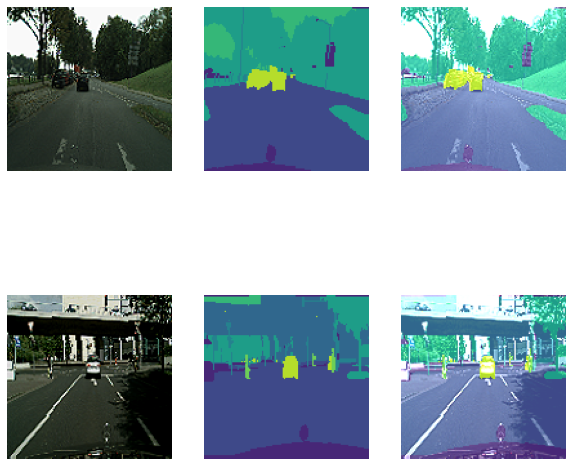

In [10]:
fig = plt.figure(figsize=(10, 15))
for i in range(0, 6, 3):
    fig.add_subplot(3, 3, i+1)
    plt.imshow(img[i])
    plt.axis('off')
    fig.add_subplot(3, 3, i+2)
    plt.imshow(set_mask_color(sg[i]))
    plt.axis('off')
    fig.add_subplot(3, 3, i+3)
    plt.imshow(np.add(img[i], set_mask_color(sg[i])))
    plt.axis('off')

## Fonctions de perte

### Multiclass Dice Loss

Lors de l'utilisation de la perte d'entropie, les distributions statistiques des labels jouent un rôle important dans la précision de l'apprentissage. Plus les distributions des labels sont déséquilibrées, plus l'entraînement sera difficile. Bien que la perte d'entropie croisée pondérée puisse atténuer la difficulté, l'amélioration n'est pas significative et le problème intrinsèque de la perte d'entropie croisée n'est pas résolu.Dans la perte d'entropie croisée, la perte est calculée comme la moyenne de la perte par pixel, et la perte par pixel est calculée discrètement, sans savoir si ses pixels adjacents sont des limites ou non. En conséquence, la perte d'entropie croisée ne considère la perte qu'au sens micro plutôt que de la considérer globalement, ce qui n'est pas suffisant pour la prédiction au niveau de l'image.

Le Dice Loss provient du coefficient de Sørensen-Dice, qui est une mesure statistique développée dans les années 1940 pour évaluer la similitude entre deux échantillons. Elle a été introduite dans la communauté de la vision par ordinateur par Milletari et al. en 2016 pour la segmentation d'images médicales 3D.

$${D = \frac{2 \Sigma^{N}_{i}p_{i}g_{i}}{\Sigma^{N}_{i}p^{2}_{i} + \Sigma^{N}_{i} g^{2}_{i}}}$$

${p_i}$ et ${g_i}$ représentent des paires de valeurs de pixels correspondants de prédiction et de vérité terrain (ground truth)

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSVFuFAnvsBMnokB9aOgY30bqfKBzJ5YiZ8Yn7FPNi96fGEj7GJxguxBotpbuWXACTgRJQ&usqp=CAU)

le numérateur n'augmente que lorsque ${p_i}$ et ${g_i}$ correspondent.

Si on ramène cela aux deux ensembles (prédits et vérité terrain), on arrive à une valeur maximale de 1 si les deux ensembles correspondent parfaitement, et à 0 s'ils sont totalement différents. Par conséquent, on peut utiliser 1 - D comme Dice Loss pour maximiser le chevauchement entre les deux ensembles.

le Dice Loss prend en compte les informations de perte à la fois localement et globalement, ce qui est essentiel à une grande précision.

Voici l'implémentation de cette métrique :

In [92]:
def dice_coef(y_true, y_pred, num_class=8, smooth=1):
    y_true_f = K.flatten(K.one_hot(K.cast(y_true, 'int32'), num_classes=num_class)[...,:])
    y_pred_f = K.flatten(y_pred[...,:])
    intersect = K.sum(y_true_f * y_pred_f, axis=-1)
    denom = K.sum(y_true_f + y_pred_f, axis=-1)
    return K.mean((2. * intersect / (denom + smooth)))

def dice_loss(y_true, y_pred):
    return 1 - dice_coef(y_true, y_pred)

## Sparse Cross Entropy

Avec cette fonction de perte, on peut garder nos masques dans le format actuel (des tenseurs d'ordre 1 où les valeurs des pixels sont les identifiants des classes à détecter).

Voir [cet article](https://towardsdatascience.com/cross-entropy-loss-function-f38c4ec8643e) pour plus d'explications sur le fonctionnement de cette fonction de perte.

## Unet mini

In [14]:
img_size = (128, 128)
num_classes = 8
batch_size = 4
imgaug_multiplier = 2
epochs = 50
patience = 10

In [88]:
def mini_u_net(image_shape, keep_prob, num_of_classes):

    # Contracting Path

    input_image = Input(image_shape)

    conv1_1 = Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv1_1')(input_image)
    conv1_2 = Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv1_2')(conv1_1)

    pool_1 = MaxPooling2D(name = 'pool_1')(conv1_2)

    conv2_1 = Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv2_1')(pool_1)
    conv2_2 = Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv2_2')(conv2_1)

    pool_2 = MaxPooling2D(name = 'pool_2')(conv2_2)

    conv3_1 = Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv3_1')(pool_2)
    conv3_2 = Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv3_2')(conv3_1)

    pool_3 = MaxPooling2D(name = 'pool_3')(conv3_2)

    conv4_1 = Conv2D(filters = 256, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv4_1')(pool_3)
    conv4_2 = Conv2D(filters = 256, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv4_2')(conv4_1)



    # Expanding Path

    upconv5_1 = UpSampling2D(name = 'upconv5_1')(conv4_2)
    upconv5_2 = Conv2D(filters = 128, kernel_size = (2, 2), activation = 'relu', padding = 'same', name = 'upconv5_2')(upconv5_1)
    concat_5 = concatenate([upconv5_2, conv3_2], axis = 3, name = 'concat_5')

    conv5_1 = Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv5_1')(concat_5)
    conv5_2 = Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv5_2')(conv5_1)


    upconv6_1 = UpSampling2D(name = 'upconv6_1')(conv5_2)
    upconv6_2 = Conv2D(filters = 64, kernel_size = (2, 2), activation = 'relu', padding = 'same', name = 'upconv6_2')(upconv6_1)
    concat_6 = concatenate([upconv6_2, conv2_2], axis = 3, name = 'concat_6')

    conv6_1 = Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv6_1')(concat_6)
    conv6_2 = Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv6_2')(conv6_1)

    upconv7_1 = UpSampling2D(name = 'upconv7_1')(conv6_2)
    upconv7_2 = Conv2D(filters = 32, kernel_size = (2, 2), activation = 'relu', padding = 'same', name = 'upconv7_2')(upconv7_1)
    concat_7 = concatenate([upconv7_2, conv1_2], axis = 3, name = 'concat_7')

    conv7_1 = Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv7_1')(concat_7)
    conv7_2 = Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv7_2')(conv7_1)

    conv8 = Conv2D(filters = num_of_classes, kernel_size = (1, 1), activation = 'softmax', name = 'conv8')(conv7_2)

    model = Model(inputs = input_image, outputs = conv8, name = 'model')

    return model

### Entraînement sans augmentation

In [55]:
callbacks_unetmini = [
    ModelCheckpoint(
        filepath = './unet_mini_weights.hdf5', 
        verbose=1, 
        save_best_only=True
    ),
    EarlyStopping(
        patience=patience, 
        verbose=1
    )
]

epochs = epochs

In [56]:
keras.backend.clear_session()
u_net_mini = mini_u_net(
    (128,128,3), 
    0.5, 
    num_classes
)
u_net_mini.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_1 (Conv2D)               (None, 128, 128, 32  896         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv1_2 (Conv2D)               (None, 128, 128, 32  9248        ['conv1_1[0][0]']                
                                )                                                             

In [99]:
def dice_loss(y_true, y_pred):
  y_true = tf.cast(y_true, tf.float32)
  y_pred = tf.math.sigmoid(y_pred)
  numerator = 2 * tf.reduce_sum(y_true * y_pred)
  denominator = tf.reduce_sum(y_true + y_pred)

  return 1 - numerator / denominator

In [58]:
u_net_mini.compile(
    optimizer="adam", 
    loss=["sparse_categorical_crossentropy", dice_loss],
    loss_weights=[1,0], # après les premiers tests effectués, nous n'utiliserons que la première fonction de perte
    metrics='sparse_categorical_accuracy'
)

In [59]:
start = time.time()
history_unetmini = u_net_mini.fit(
    train_g, 
    epochs=epochs, 
    validation_data=val_g, 
    callbacks=callbacks_unetmini
)
end = time.time()
training_time_unetmini = end - start

Epoch 1/50
743/743 [==============================] - ETA: 0s - loss: 0.8736 - sparse_categorical_accuracy: 0.6991
Epoch 1: val_loss improved from inf to 0.74789, saving model to ./unet_mini_weights.hdf5
743/743 [==============================] - 376s 504ms/step - loss: 0.8736 - sparse_categorical_accuracy: 0.6991 - val_loss: 0.7479 - val_sparse_categorical_accuracy: 0.7442
Epoch 2/50
743/743 [==============================] - ETA: 0s - loss: 0.5766 - sparse_categorical_accuracy: 0.8151
Epoch 2: val_loss improved from 0.74789 to 0.59130, saving model to ./unet_mini_weights.hdf5
743/743 [==============================] - 374s 504ms/step - loss: 0.5766 - sparse_categorical_accuracy: 0.8151 - val_loss: 0.5913 - val_sparse_categorical_accuracy: 0.8088
Epoch 3/50
743/743 [==============================] - ETA: 0s - loss: 0.5046 - sparse_categorical_accuracy: 0.8425
Epoch 3: val_loss improved from 0.59130 to 0.51646, saving model to ./unet_mini_weights.hdf5
743/743 [=========================

In [60]:
u_net_mini.save('unet_mini.h5')
files.download("unet_mini.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [61]:
pickle.dump(history_unetmini.history, open("history_unetmini", "wb"))
files.download("history_unetmini")
pickle.dump(training_time_unetmini, open("training_time_unetmini", "wb"))
files.download("training_time_unetmini")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [75]:
def plot_loss_accuracy(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    _epochs = list(range(1, len(loss) + 1))
    plt.plot(_epochs, loss, 'y', label='Perte Training')
    plt.plot(_epochs, val_loss, 'r', label='Perte Validation')
    plt.title('Perte Training et Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    acc = history.history['sparse_categorical_accuracy']
    val_acc = history.history['val_sparse_categorical_accuracy']
    plt.plot(_epochs, acc, 'y', label='Accuracy Training')
    plt.plot(_epochs, val_acc, 'r', label='Accuracy Validation')
    plt.title('Accuracy Training et Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

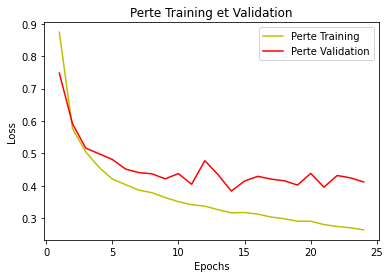

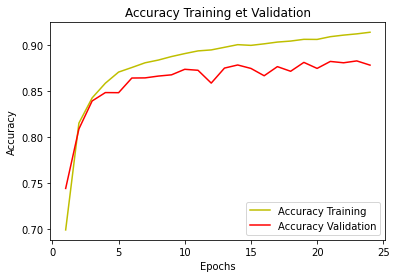

In [63]:
plot_loss_accuracy(history_unetmini)

In [30]:
def segment_it(X_test, model, print_range=4):
    start_pred = time.time()
    y_pred=model.predict(X_test)
    y_pred_argmax=np.argmax(y_pred, axis=3)
    end_pred = time.time()
    predict_time = end_pred - start_pred
    for idx in range(print_range):
        plt.imshow(X_test[idx])
        plt.imshow(y_pred_argmax[idx],alpha = 0.4)
        plt.axis('off')
        plt.show()
    print("temps de prédiction pour {} images : {}s".format(len(X_test), predict_time))
    return y_pred_argmax

def convert_y_pred(y_pred):
  y_pred = np.expand_dims(y_pred, 3).astype(np.float64)
  return y_pred

In [17]:
for X_test, y_test in test_g:
    break

1/1 [==============================] - 0s 22ms/step


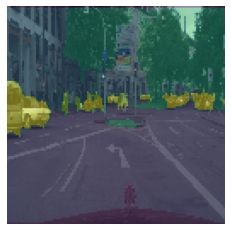

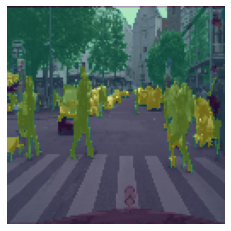

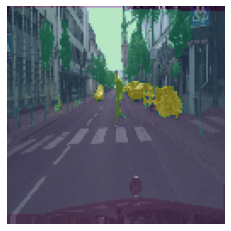

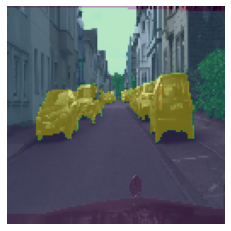

temps de prédiction pour 4 images : 0.06032252311706543s


In [35]:
y_pred_argmax = segment_it(X_test, u_net_mini)

### Evaluation

In [50]:
u_net_mini = keras.models.load_model("unet_mini.h5", custom_objects={'loss': dice_loss})

In [85]:
results = u_net_mini.evaluate(val_g)
print(results)
res_dict["unet_mini_no_aug"] = results

125/125 [==============================] - 61s 484ms/step - loss: 0.4123 - sparse_categorical_accuracy: 0.8781
[0.41228726506233215, 0.8781335353851318]


### Entrainement avec fonction de perte dice_loss

In [86]:
callbacks_unetmini_dice = [
    ModelCheckpoint(
        filepath = './unet_mini_weights_dice.hdf5', 
        verbose=1, 
        save_best_only=True
    ),
    EarlyStopping(
        patience=patience, 
        verbose=1
    )
]

epochs = epochs

In [89]:
keras.backend.clear_session()
u_net_mini_dice = mini_u_net(
    (128,128,3), 
    0.5, 
    num_classes
)
u_net_mini_dice.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_1 (Conv2D)               (None, 128, 128, 32  896         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv1_2 (Conv2D)               (None, 128, 128, 32  9248        ['conv1_1[0][0]']                
                                )                                                             

In [100]:
u_net_mini_dice.compile(
    optimizer="adam", 
    loss=dice_loss,
    metrics=['sparse_categorical_accuracy']
)

In [101]:
start = time.time()
history_unetmini_dice = u_net_mini_dice.fit(
    train_g, 
    epochs=epochs, 
    validation_data=val_g, 
    callbacks=callbacks_unetmini_dice
)
end = time.time()
training_time_unetmini_aug = end - start

Epoch 1/50
743/743 [==============================] - ETA: 0s - loss: 0.1446 - sparse_categorical_accuracy: 0.1011
Epoch 1: val_loss improved from 0.88126 to 0.14711, saving model to ./unet_mini_weights_dice.hdf5
743/743 [==============================] - 420s 563ms/step - loss: 0.1446 - sparse_categorical_accuracy: 0.1011 - val_loss: 0.1471 - val_sparse_categorical_accuracy: 0.1187
Epoch 2/50
743/743 [==============================] - ETA: 0s - loss: 0.1446 - sparse_categorical_accuracy: 0.1010
Epoch 2: val_loss improved from 0.14711 to 0.14700, saving model to ./unet_mini_weights_dice.hdf5
743/743 [==============================] - 411s 553ms/step - loss: 0.1446 - sparse_categorical_accuracy: 0.1010 - val_loss: 0.1470 - val_sparse_categorical_accuracy: 0.1187
Epoch 3/50
743/743 [==============================] - ETA: 0s - loss: 0.1446 - sparse_categorical_accuracy: 0.1010
Epoch 3: val_loss did not improve from 0.14700
743/743 [==============================] - 417s 561ms/step - loss:

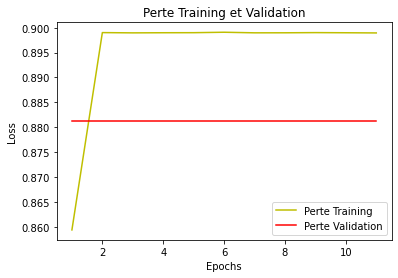

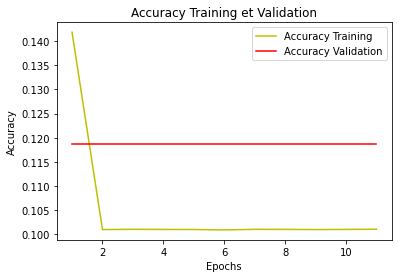

In [96]:
plot_loss_accuracy(history_unetmini_dice)

1/1 [==============================] - 0s 192ms/step


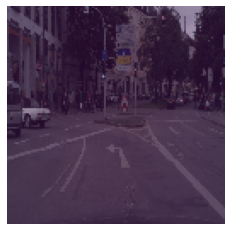

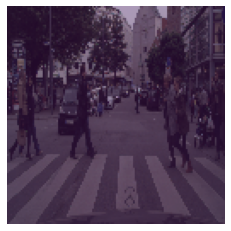

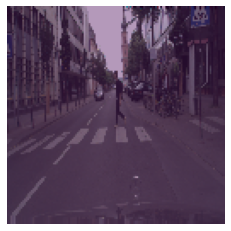

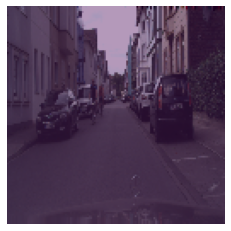

temps de prédiction pour 4 images : 0.22887206077575684s


In [97]:
y_pred_argmax = segment_it(X_test, u_net_mini_dice)

#### Evaluation

In [98]:
results = u_net_mini_dice.evaluate(test_g)
print(results)
res_dict["unet_mini_dice"] = results

125/125 [==============================] - 60s 476ms/step - loss: 0.8813 - sparse_categorical_accuracy: 0.1187
[0.8812593817710876, 0.11874084174633026]


Le moins que l'on puisse dire, est que l'utilisation de cette fonction de perte n'est pas très concluante dans notre cas. Nous privilégierons donc Sparse_categorical_entropy

### Entraînement avec augmentation

In [67]:
callbacks_unetmini_aug = [
    ModelCheckpoint(
        filepath = './unet_mini_weights_aug.hdf5', 
        verbose=1, 
        save_best_only=True
    ),
    EarlyStopping(
        patience=patience, 
        verbose=1
    )
]

epochs = epochs

In [68]:
keras.backend.clear_session()
u_net_mini_aug = mini_u_net(
    (128,128,3), 
    0.5, 
    num_classes
)
u_net_mini_aug.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_1 (Conv2D)               (None, 128, 128, 32  896         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv1_2 (Conv2D)               (None, 128, 128, 32  9248        ['conv1_1[0][0]']                
                                )                                                             

In [69]:
u_net_mini_aug.compile(
    optimizer="adam", 
    loss=["sparse_categorical_crossentropy", dice_loss],
    loss_weights=[1,0],
    metrics=['sparse_categorical_accuracy']
)

In [70]:
start = time.time()
history_unetmini_aug = u_net_mini_aug.fit(
    train_g_aug, 
    epochs=epochs, 
    validation_data=val_g, 
    callbacks=callbacks_unetmini_aug
)
end = time.time()
training_time_unetmini_aug = end - start

Epoch 1/50
2975/2975 [==============================] - ETA: 0s - loss: 0.6903 - sparse_categorical_accuracy: 0.7663
Epoch 1: val_loss improved from inf to 0.68405, saving model to ./unet_mini_weights_aug.hdf5
2975/2975 [==============================] - 1363s 458ms/step - loss: 0.6903 - sparse_categorical_accuracy: 0.7663 - val_loss: 0.6841 - val_sparse_categorical_accuracy: 0.7778
Epoch 2/50
2975/2975 [==============================] - ETA: 0s - loss: 0.4763 - sparse_categorical_accuracy: 0.8498
Epoch 2: val_loss improved from 0.68405 to 0.60074, saving model to ./unet_mini_weights_aug.hdf5
2975/2975 [==============================] - 1356s 456ms/step - loss: 0.4763 - sparse_categorical_accuracy: 0.8498 - val_loss: 0.6007 - val_sparse_categorical_accuracy: 0.8148
Epoch 3/50
2975/2975 [==============================] - ETA: 0s - loss: 0.4250 - sparse_categorical_accuracy: 0.8665
Epoch 3: val_loss improved from 0.60074 to 0.56958, saving model to ./unet_mini_weights_aug.hdf5
2975/2975 

In [71]:
pickle.dump(training_time_unetmini_aug, open("training_time_unetmini_aug", "wb"))
files.download("training_time_unetmini_aug")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [72]:
u_net_mini_aug.save("unet_mini_aug.h5")
files.download("unet_mini_aug.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [73]:
pickle.dump(history_unetmini_aug.history, open("history_unetmini_aug", "wb"))
files.download("history_unetmini_aug")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

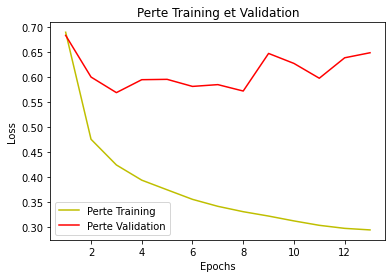

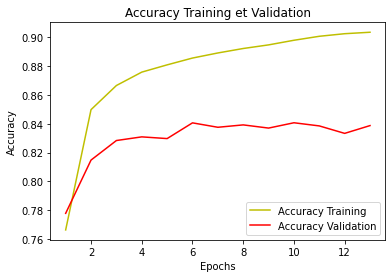

In [74]:
plot_loss_accuracy(history_unetmini_aug)

1/1 [==============================] - 0s 222ms/step


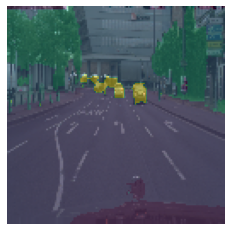

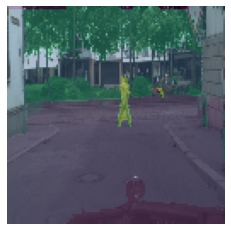

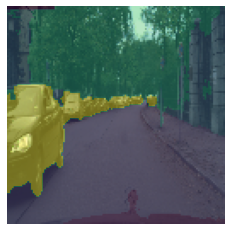

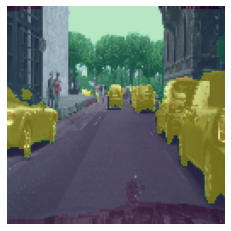

temps de prédiction pour 4 images : 0.26407670974731445s


In [75]:
y_pred_argmax = segment_it(X_test, u_net_mini_aug)

### Evaluation

In [22]:
u_net_mini_aug = keras.models.load_model("unet_mini_aug.h5", custom_objects={'loss': dice_loss})

In [83]:
results = u_net_mini_aug.evaluate(test_g)
print(results)
res_dict["unet_mini"] = results

125/125 [==============================] - 59s 473ms/step - loss: 0.6493 - sparse_categorical_accuracy: 0.8387
[0.6492999792098999, 0.8387020230293274]


## Unet

In [15]:
def get_unet(img_size, num_classes):
    inputs = Input(shape=img_size + (3,))
    s = Lambda(lambda x: x/255)(inputs)
    c1 = Conv2D(16, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(inputs)
    c1 = Dropout(0.1)(c1)
    c1 = Conv2D(16, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = MaxPool2D((2, 2))(c1)

    c2 = Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = Dropout(0.1)(c2)
    c2 = Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = MaxPool2D((2, 2))(c2)

    c3 = Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = MaxPool2D((2, 2))(c3)


    c4 = Conv2D(128, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(128, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = MaxPool2D((2, 2))(c4)


    c5 = Conv2D(256, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = Dropout(0.3)(c5)
    c5 = Conv2D(256, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

    u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)



    u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)



    u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = Dropout(0.1)(c8)
    c8 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)



    u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1])
    c9 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = Dropout(0.1)(c9)
    c9 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

    outputs = Conv2D(num_classes, 3, activation="softmax", padding="same")(c9)

    return Model(inputs=[inputs], outputs=[outputs])

In [77]:
callbacks_unet = [
    ModelCheckpoint(
        filepath = './unet_weights.hdf5', 
        verbose=1, 
        save_best_only=True
    ),
    EarlyStopping(
        patience=patience, 
        verbose=1
    )
]

epochs = epochs

In [78]:
keras.backend.clear_session()

model_unet = get_unet(img_size, num_classes)
model_unet.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 16  448         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 dropout (Dropout)              (None, 128, 128, 16  0           ['conv2d[0][0]']                 
                                )                                                             

In [79]:
model_unet.compile(
    optimizer="adam", 
    loss=["sparse_categorical_crossentropy", dice_loss],
    loss_weights=[1,0], 
    metrics=['sparse_categorical_accuracy']
)

In [80]:
start = time.time()
history_unet = model_unet.fit(
    train_g_aug, 
    epochs=epochs, 
    validation_data=val_g, 
    callbacks=callbacks_unet
)
end = time.time()
training_time_unet = end - start

Epoch 1/50
2975/2975 [==============================] - ETA: 0s - loss: 0.6822 - sparse_categorical_accuracy: 0.7678
Epoch 1: val_loss improved from inf to 0.68279, saving model to ./unet_weights.hdf5
2975/2975 [==============================] - 1250s 419ms/step - loss: 0.6822 - sparse_categorical_accuracy: 0.7678 - val_loss: 0.6828 - val_sparse_categorical_accuracy: 0.7912
Epoch 2/50
2975/2975 [==============================] - ETA: 0s - loss: 0.4974 - sparse_categorical_accuracy: 0.8417
Epoch 2: val_loss improved from 0.68279 to 0.60881, saving model to ./unet_weights.hdf5
2975/2975 [==============================] - 1249s 420ms/step - loss: 0.4974 - sparse_categorical_accuracy: 0.8417 - val_loss: 0.6088 - val_sparse_categorical_accuracy: 0.8141
Epoch 3/50
2975/2975 [==============================] - ETA: 0s - loss: 0.4492 - sparse_categorical_accuracy: 0.8578
Epoch 3: val_loss did not improve from 0.60881
2975/2975 [==============================] - 1256s 422ms/step - loss: 0.4492 -

In [81]:
model_unet.save("model_unet.h5")
files.download("model_unet.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [82]:
pickle.dump(history_unet.history, open("history_unet", "wb"))
files.download("history_unet")
pickle.dump(training_time_unet, open("training_time_unet", "wb"))
files.download("training_time_unet")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

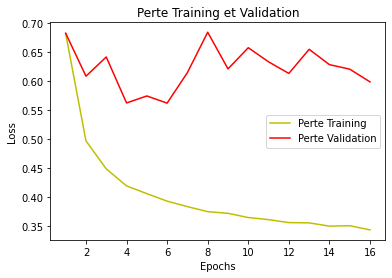

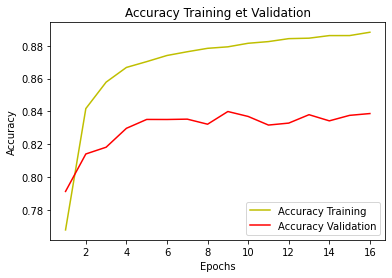

In [83]:
plot_loss_accuracy(history_unet)

1/1 [==============================] - 0s 301ms/step


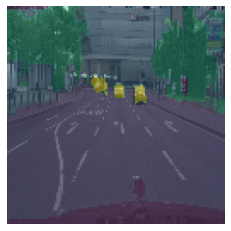

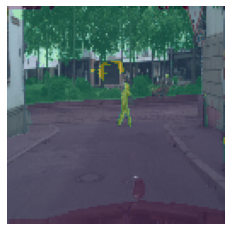

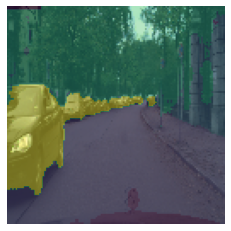

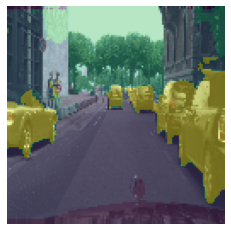

temps de prédiction pour 4 images : 0.3460574150085449s


In [85]:
y_pred_argmax = segment_it(X_test, model_unet)

### Evaluation

In [24]:
model_unet = keras.models.load_model("model_unet.h5", custom_objects={'loss': dice_loss})

In [82]:
results = model_unet.evaluate(test_g)
print(results)
res_dict["unet"] = results

125/125 [==============================] - 59s 471ms/step - loss: 0.5990 - sparse_categorical_accuracy: 0.8387
[0.5989950299263, 0.8386785984039307]


### Entrainement sans augmentation              

In [16]:
callbacks_unet_no_aug = [
    ModelCheckpoint(
        filepath = './unet_weights_no_aug.hdf5', 
        verbose=1, 
        save_best_only=True
    ),
    EarlyStopping(
        patience=patience, 
        verbose=1
    )
]

epochs = epochs

In [17]:
keras.backend.clear_session()

model_unet_no_aug = get_unet(img_size, num_classes)
model_unet_no_aug.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 16  448         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 dropout (Dropout)              (None, 128, 128, 16  0           ['conv2d[0][0]']                 
                                )                                                             

In [22]:
model_unet_no_aug.compile(
    optimizer="adam", 
    loss=["sparse_categorical_crossentropy", dice_loss], 
    loss_weights=[1,0],
    metrics=['sparse_categorical_accuracy']
)

In [23]:
start = time.time()
history_unet_no_aug = model_unet_no_aug.fit(
    train_g, 
    epochs=epochs, 
    validation_data=val_g, 
    callbacks=callbacks_unet_no_aug
)
end = time.time()
training_time_unet_noaug = end - start

Epoch 1/50
743/743 [==============================] - ETA: 0s - loss: 0.7590 - sparse_categorical_accuracy: 0.7441
Epoch 1: val_loss improved from inf to 0.73907, saving model to ./unet_weights_no_aug.hdf5
743/743 [==============================] - 360s 478ms/step - loss: 0.7590 - sparse_categorical_accuracy: 0.7441 - val_loss: 0.7391 - val_sparse_categorical_accuracy: 0.7574
Epoch 2/50
743/743 [==============================] - ETA: 0s - loss: 0.5347 - sparse_categorical_accuracy: 0.8327
Epoch 2: val_loss improved from 0.73907 to 0.60890, saving model to ./unet_weights_no_aug.hdf5
743/743 [==============================] - 354s 477ms/step - loss: 0.5347 - sparse_categorical_accuracy: 0.8327 - val_loss: 0.6089 - val_sparse_categorical_accuracy: 0.8109
Epoch 3/50
743/743 [==============================] - ETA: 0s - loss: 0.4770 - sparse_categorical_accuracy: 0.8526
Epoch 3: val_loss improved from 0.60890 to 0.55959, saving model to ./unet_weights_no_aug.hdf5
743/743 [===================

In [24]:
model_unet_no_aug.save("model_unet_no_aug.h5")
files.download("model_unet_no_aug.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [26]:
model_unet_no_aug = keras.models.load_model("model_unet_no_aug.h5", custom_objects={'loss': dice_loss})

In [ ]:
pickle.dump(history_unet_no_aug.history, open("history_unet_no_aug", "wb"))
files.download("model_unet_no_aug.h5")
pickle.dump(training_time_unet_noaug, open("training_time_unet_noaug", "wb"))
files.download("training_time_unet_noaug")

In [59]:
history_unet_no_aug = pickle.load(open("history_unet_no_aug", "rb"))

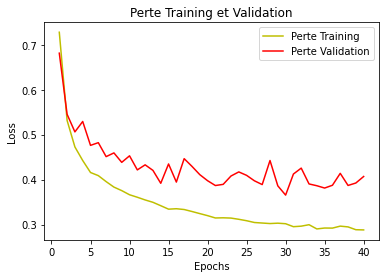

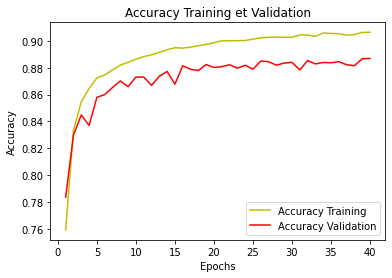

In [62]:
plot_loss_accuracy(history_unet_no_aug)

1/1 [==============================] - 0s 251ms/step


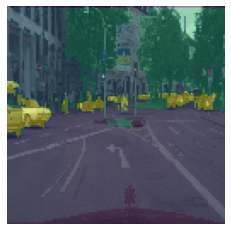

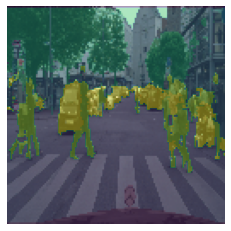

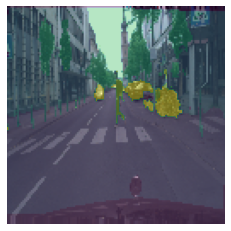

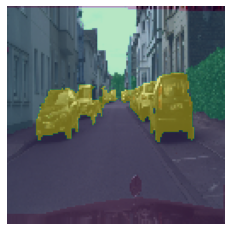

temps de prédiction pour 4 images : 0.28933095932006836s


In [63]:
y_pred_argmax = segment_it(X_test, model_unet_no_aug)

### Evaluation

In [ ]:
model_unet_no_aug = keras.models.load_model("model_unet_no_aug.h5")

In [81]:
results = model_unet_no_aug.evaluate(test_g)
print(results)
res_dict["unet_no_aug"] = results

125/125 [==============================] - 60s 475ms/step - loss: 0.4069 - sparse_categorical_accuracy: 0.8868
[0.4068770408630371, 0.8868465423583984]


## VGG16 (transfer learning) avec augmentation

In [25]:
sm.set_framework('tf.keras')
sm.framework()

keras.backend.clear_session()

EPOCHS = 20
BACKBONE = 'vgg16'
n_classes = 8
preprocess_input = sm.get_preprocessing(BACKBONE)

callbacks_vgg16 = [
    ModelCheckpoint(
        filepath = './vgg16_weights.hdf5', 
        verbose=1, 
        save_best_only=True
    ),
    EarlyStopping(
        patience=patience, 
        verbose=1
    )
]


model_vgg16 = sm.Unet(
    BACKBONE, 
    classes=n_classes, 
    encoder_weights='imagenet',
    activation='softmax'
)
model_vgg16.compile(
    'Adam',
    loss=["sparse_categorical_crossentropy", dice_loss], 
    loss_weights = [1,0],
    metrics=['sparse_categorical_accuracy']
)
model_vgg16.summary()

58889256/58889256 [==============================] - 2s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 block1_conv1 (Conv2D)          (None, None, None,   1792        ['input_1[0][0]']                
                                64)                                                               
                                                                                                  
 block1_conv2 (Conv2D)          (None, None, None,   36928       ['block1_conv1[0][0]']           
                             

In [26]:
start = time.time()
history_vgg16 = model_vgg16.fit(
    train_g_aug, 
    epochs=EPOCHS, 
    validation_data=val_g, 
    callbacks=callbacks_vgg16
)
end = time.time()
training_time_vgg16 = end - start

Epoch 1/20
2975/2975 [==============================] - ETA: 0s - loss: 0.5425 - sparse_categorical_accuracy: 0.8235
Epoch 1: val_loss improved from inf to 0.53563, saving model to ./vgg16_weights.hdf5
2975/2975 [==============================] - 1484s 497ms/step - loss: 0.5425 - sparse_categorical_accuracy: 0.8235 - val_loss: 0.5356 - val_sparse_categorical_accuracy: 0.8235
Epoch 2/20
2975/2975 [==============================] - ETA: 0s - loss: 0.4129 - sparse_categorical_accuracy: 0.8677
Epoch 2: val_loss improved from 0.53563 to 0.46335, saving model to ./vgg16_weights.hdf5
2975/2975 [==============================] - 1472s 495ms/step - loss: 0.4129 - sparse_categorical_accuracy: 0.8677 - val_loss: 0.4633 - val_sparse_categorical_accuracy: 0.8497
Epoch 3/20
2975/2975 [==============================] - ETA: 0s - loss: 0.3658 - sparse_categorical_accuracy: 0.8813
Epoch 3: val_loss did not improve from 0.46335
2975/2975 [==============================] - 1473s 495ms/step - loss: 0.3658

In [27]:
model_vgg16.save("model_vgg16.h5")
files.download("model_vgg16.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:
pickle.dump(history_vgg16.history, open("history_vgg16", "wb"))
files.download("history_vgg16")
pickle.dump(training_time_vgg16, open("training_time_vgg16", "wb"))
files.download("training_time_vgg16")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

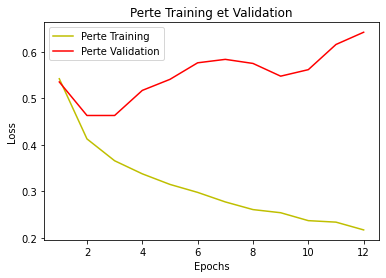

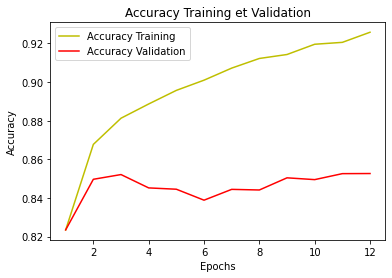

In [31]:
plot_loss_accuracy(history_vgg16)

1/1 [==============================] - 0s 342ms/step


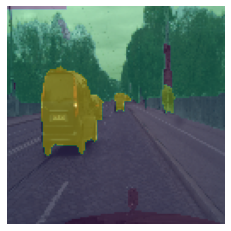

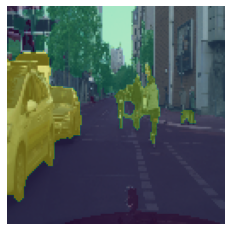

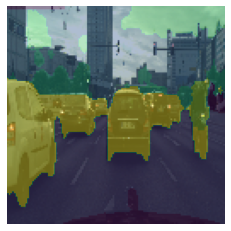

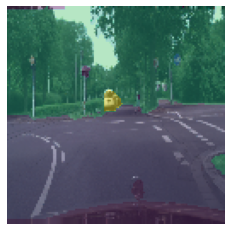

temps de prédiction pour 4 images : 0.391845703125s


In [35]:
y_pred_argmax = segment_it(X_test, model_vgg16)

### Evaluation

In [65]:
model_vgg16 = keras.models.load_model("model_vgg16.h5", custom_objects={'loss': dice_loss})

In [66]:
results = model_vgg16.evaluate(test_g)
print(results)

125/125 [==============================] - 59s 466ms/step - loss: 0.6427 - sparse_categorical_accuracy: 0.8526
[0.6427303552627563, 0.8526437878608704]


In [68]:
res_dict["vgg16"] = results

### VGG16 sans augmentation

In [71]:
sm.set_framework('tf.keras')
sm.framework()

keras.backend.clear_session()

EPOCHS = 20
BACKBONE = 'vgg16'
n_classes = 8
preprocess_input = sm.get_preprocessing(BACKBONE)

callbacks_vgg16_no_aug = [
    ModelCheckpoint(
        filepath = './vgg16_weights.hdf5', 
        verbose=1, 
        save_best_only=True
    ),
    EarlyStopping(
        patience=patience, 
        verbose=1
    )
]


model_vgg16_no_aug = sm.Unet(
    BACKBONE, 
    classes=n_classes, 
    encoder_weights='imagenet',
    activation='softmax'
)
model_vgg16_no_aug.compile(
    'Adam',
    loss=["sparse_categorical_crossentropy", dice_loss], 
    loss_weights = [1,0],
    metrics=['sparse_categorical_accuracy']
)
model_vgg16_no_aug.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 block1_conv1 (Conv2D)          (None, None, None,   1792        ['input_1[0][0]']                
                                64)                                                               
                                                                                                  
 block1_conv2 (Conv2D)          (None, None, None,   36928       ['block1_conv1[0][0]']           
                                64)                                                           

In [73]:
start = time.time()
history_vgg16_no_aug = model_vgg16_no_aug.fit(
    train_g, 
    epochs=EPOCHS, 
    validation_data=val_g, 
    callbacks=callbacks_vgg16_no_aug
)
end = time.time()
training_time_vgg16_no_aug = end - start
print("Training time : ", training_time_vgg16_no_aug)

Epoch 1/20
743/743 [==============================] - ETA: 0s - loss: 0.5832 - sparse_categorical_accuracy: 0.8150
Epoch 1: val_loss improved from inf to 0.77374, saving model to ./vgg16_weights.hdf5
743/743 [==============================] - 403s 542ms/step - loss: 0.5832 - sparse_categorical_accuracy: 0.8150 - val_loss: 0.7737 - val_sparse_categorical_accuracy: 0.7406
Epoch 2/20
743/743 [==============================] - ETA: 0s - loss: 0.4768 - sparse_categorical_accuracy: 0.8490
Epoch 2: val_loss improved from 0.77374 to 0.50000, saving model to ./vgg16_weights.hdf5
743/743 [==============================] - 399s 537ms/step - loss: 0.4768 - sparse_categorical_accuracy: 0.8490 - val_loss: 0.5000 - val_sparse_categorical_accuracy: 0.8398
Epoch 3/20
743/743 [==============================] - ETA: 0s - loss: 0.4269 - sparse_categorical_accuracy: 0.8656
Epoch 3: val_loss did not improve from 0.50000
743/743 [==============================] - 400s 539ms/step - loss: 0.4269 - sparse_categ

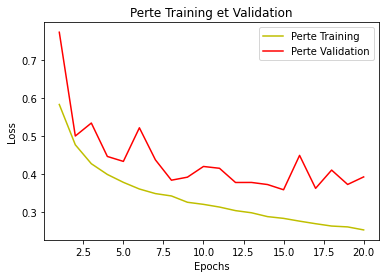

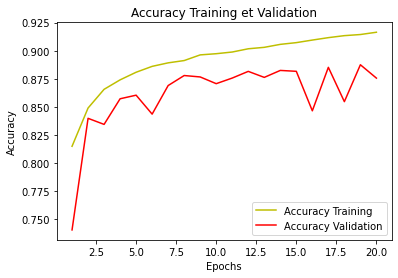

In [76]:
plot_loss_accuracy(history_vgg16_no_aug)

1/1 [==============================] - 0s 312ms/step


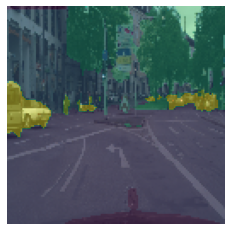

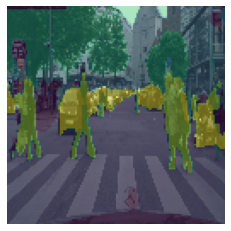

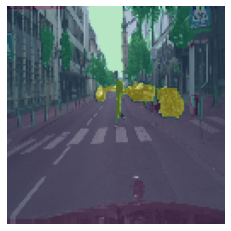

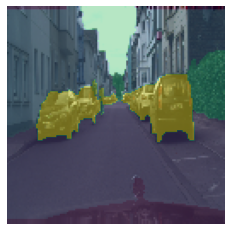

temps de prédiction pour 4 images : 0.35329222679138184s


In [77]:
y_pred_argmax = segment_it(X_test, model_vgg16)

In [78]:
results = model_vgg16_no_aug.evaluate(test_g)
print(results)
res_dict["vgg16_no_aug"] = results

125/125 [==============================] - 59s 472ms/step - loss: 0.3921 - sparse_categorical_accuracy: 0.8756
[0.3920971155166626, 0.8756218552589417]


In [79]:
model_vgg16_no_aug.save("model_vgg16_no_aug.h5")
pickle.dump(history_vgg16_no_aug.history, open("history_vgg16_no_aug", "wb"))

In [80]:
files.download("model_vgg16_no_aug.h5")
files.download("history_vgg16_no_aug")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Comparaison des modèles

In [ ]:
print("Training time unet with augmentation : ",training_time_unet)
print("Training time unet without augmentation : ",training_time_unet_noaug)
print("Training time unet-mini : ", training_time_unetmini)
print("Training time unet-mini with augmentation : ",training_time_unetmini_aug)
print("Training time VGG16 : ",training_time_vgg16)

In [102]:
res_dict

{'vgg16': [0.6427303552627563, 0.8526437878608704],
 'vgg16_no_aug': [0.3920971155166626, 0.8756218552589417],
 'unet_no_aug': [0.4068770408630371, 0.8868465423583984],
 'unet': [0.5989950299263, 0.8386785984039307],
 'unet_mini': [0.6492999792098999, 0.8387020230293274],
 'unet_mini_no_aug': [0.41228726506233215, 0.8781335353851318],
 'unet_mini_dice': [0.8812593817710876, 0.11874084174633026]}

In [105]:
losses = {}
sparse_cat_acc = {}

for seg_model in res_dict:
  losses[seg_model] = res_dict[seg_model][0]
  sparse_cat_acc[seg_model] = res_dict[seg_model][1]


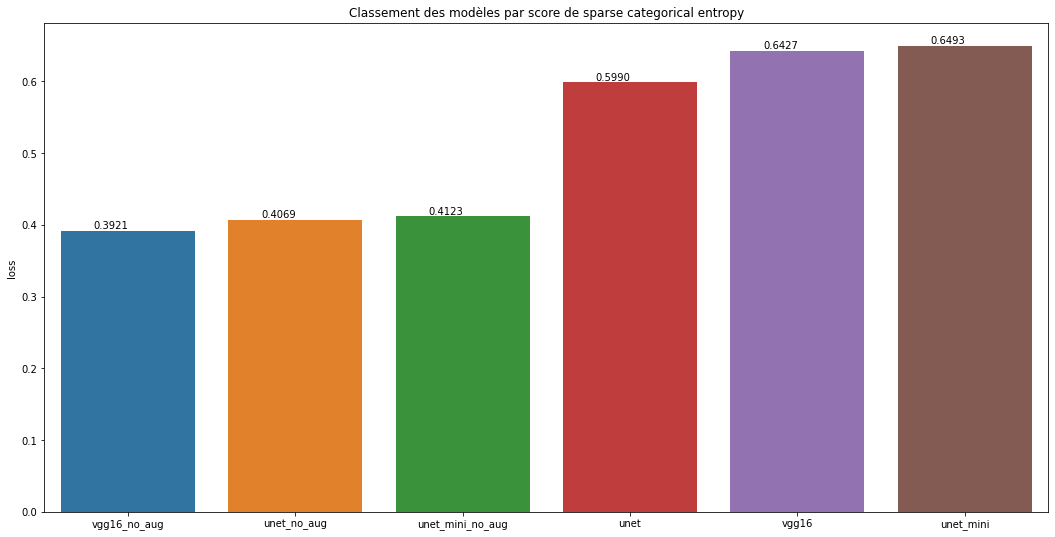

In [153]:
loss_df = pd.DataFrame.from_dict(losses, orient="index")
loss_df = loss_df.rename(columns={loss_df.columns[0]: "loss"})
loss_df = loss_df.sort_values(by="loss")
loss_df.drop(["unet_mini_dice"], inplace=True)

fig = plt.figure(figsize=(18,9))
plt.title("Classement des modèles par score de sparse categorical entropy")
ax = sns.barplot(
  data=loss_df,
  x=loss_df.index,
  y="loss",
)
for p in ax.patches:
    ax.annotate('{:.04f}'.format(p.get_height()),
                   (p.get_x() + 0.3, p.get_height()),
                   ha='center',
                   va='bottom',
                   color='black')

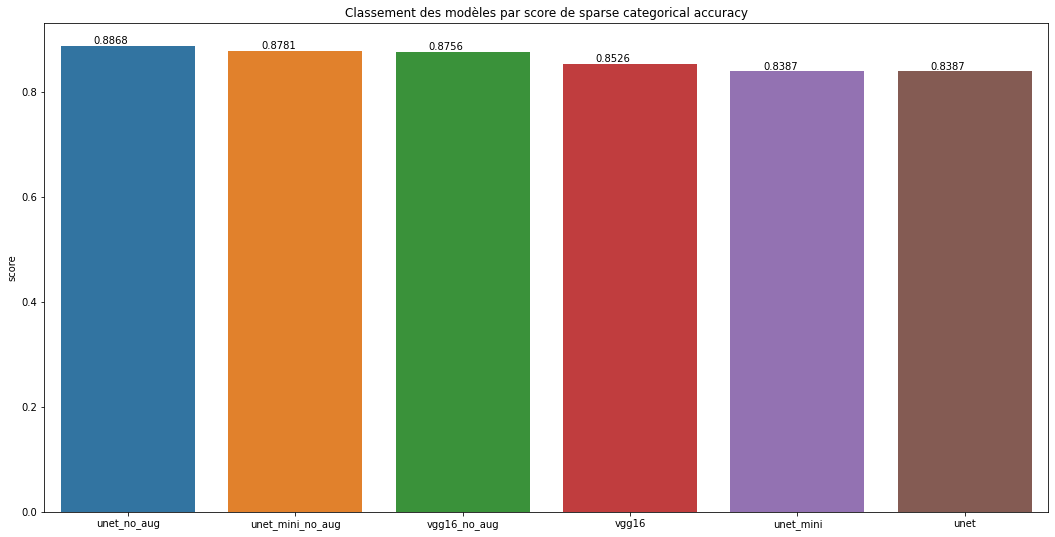

In [154]:
score_df = pd.DataFrame.from_dict(sparse_cat_acc, orient="index")
score_df = score_df.rename(columns={score_df.columns[0]: "score"})
score_df = score_df.sort_values(by="score", ascending=False)
score_df.drop(["unet_mini_dice"], inplace=True)

fig = plt.figure(figsize=(18,9))
plt.title("Classement des modèles par score de sparse categorical accuracy")
ax = sns.barplot(
  data=score_df,
  x=score_df.index,
  y="score",
)
for p in ax.patches:
  ax.annotate(
        '{:.04f}'.format(p.get_height()),
        (p.get_x() + 0.3, p.get_height()),
        ha='center',
        va='bottom',
        color='black'
  )